<a href="https://colab.research.google.com/github/ProfAndersonVanin/FATEC_Sistemas_Operacionais_Redes/blob/main/Aula05_Threads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Threads
Vamos começar com um programa simples:

In [1]:
from time import sleep, perf_counter

def tarefa():
    print('Começando um tarefa...')
    sleep(1)
    print('feito!')

inicio = perf_counter()

tarefa()
tarefa()

fim = perf_counter()

print(f'Levou {fim - inicio: 0.2f} segundo(s) para completar.')

Começando um tarefa...
feito!
Começando um tarefa...
feito!
Levou  2.00 segundo(s) para completar.


Como você pode esperar, o programa leva cerca de dois segundos para ser concluído. Se você chamar a task()função 10 vezes, levará cerca de 10 segundos para ser concluída.

O diagrama a seguir ilustra como o programa funciona:

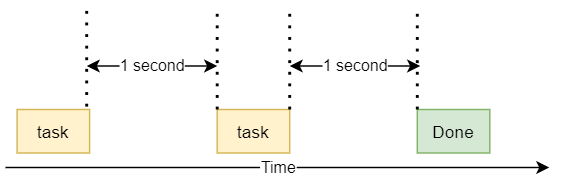

Primeiro, a função **tarefa()** é executada e inativa por um segundo. Em seguida, ele executa a segunda vez e também dorme por mais um segundo. Por fim, o programa é concluído.

Quando a função **tarefa()** chama a função **sleep()**, a CPU está ociosa. Em outras palavras, a CPU não faz nada, o que não é eficiente em termos de utilização de recursos.

Este programa possui um processo com um único thread, chamado de thread principal. Como o programa tem apenas um thread, ele é chamado de **programa de thread único**.

# Usando threading Python para desenvolver um exemplo de programa multi-threaded

In [2]:
from time import sleep, perf_counter
from threading import Thread

def tarefa():
    print('Começando um tarefa...')
    sleep(1)
    print('feito!')

inicio = perf_counter()

# Criando 2 novas threads
t1 = Thread(target=tarefa)
t2 = Thread(target=tarefa)

# iniciando as threads
t1.start()
t2.start()

# esperando as threads ficarem completas
t1.join()
t2.join()

fim = perf_counter()

print(f'Levou {fim - inicio: 0.2f} segundo(s) para completar.')

Começando um tarefa...
Começando um tarefa...
feito!
feito!
Levou  1.01 segundo(s) para completar.


Quando o programa for executado, **ele terá três threads**: a thread principal é criada pelo interpretador Python e duas threads são criadas pelo programa.

Conforme mostrado claramente na saída, o programa levou um segundo em vez de dois para ser concluído.

O diagrama a seguir mostra como as threads são executadas:

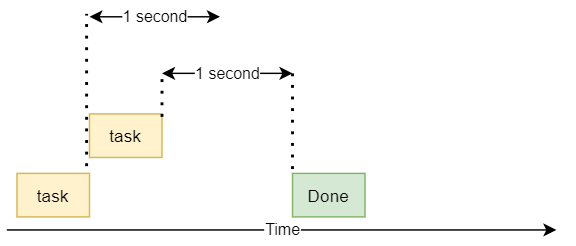

# Passando argumentos para threads
O programa a seguir mostra como passar argumentos para a função atribuída a um thread:

In [3]:
from time import sleep, perf_counter
from threading import Thread

def tarefa(id):
    print(f'Começando a tarefa {id}...')
    sleep(1)
    print(f'A tarefa {id} está completa')

inicio = perf_counter()

# criando e iniciando 10 threads
threads = []
for n in range(1, 11):
    t = Thread(target=tarefa, args=(n,))
    threads.append(t)
    t.start()

# esperando as threads ficarem completas
for t in threads:
    t.join()

fim = perf_counter()

print(f'Levou {fim - inicio: 0.2f} segundo(s) para completar.')

Começando a tarefa 1...
Começando a tarefa 2...
Começando a tarefa 3...Começando a tarefa 4...

Começando a tarefa 5...
Começando a tarefa 6...
Começando a tarefa 7...
Começando a tarefa 8...
Começando a tarefa 9...
Começando a tarefa 10...
A tarefa 1 está completa
A tarefa 2 está completa
A tarefa 3 está completa
A tarefa 4 está completa
A tarefa 5 está completa
A tarefa 6 está completa
A tarefa 7 está completa
A tarefa 8 está completa
A tarefa 9 está completa
A tarefa 10 está completa
Levou  1.02 segundo(s) para completar.


Levou apenas 1,02 segundos para ser concluído.

Observe que o programa não executa a thread na ordem de 1 a 10.

# Quando usar o threading do Python
Há duas tarefas principais:
*   Tarefas limitadas por I/O – o tempo gasto em I/O é significativamente maior do que o tempo gasto em computação
*   Tarefas vinculadas à CPU – o tempo gasto em computação é significativamente maior do que o tempo de espera por E/S.

O encadeamento do Python é otimizado para tarefas vinculadas a E/S. Por exemplo, solicitar recursos remotos, conectar um servidor de banco de dados ou ler e gravar arquivos.

# Um exemplo prático de threading em Python
Suponha que você tenha uma lista de arquivos de texto em uma pasta, por exemplo, **C:/temp/**. E você deseja substituir um texto por um novo em todos os arquivos.

O seguinte programa de thread único mostra como substituir uma substring pela nova nos arquivos de texto:

Para executar este programa pelo Colab, crie uma pasta temp em content e faça upload dos 10 arquivos de texto.
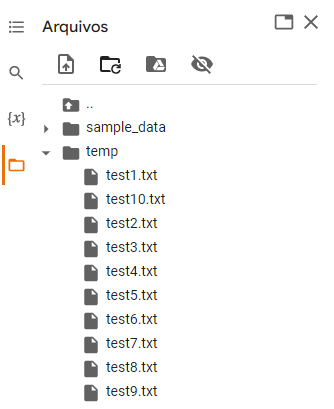

In [4]:
from time import perf_counter

def replace(filename, substr, new_substr):
    print(f'Processando o arquivo {filename}')
    # pegando o conteúdo do arquivo
    with open(filename, 'r') as f:
        content = f.read()

    # trocando a substr por uma nova new_substr
    content = content.replace(substr, new_substr)

    # escrevendo os dados no arquivo
    with open(filename, 'w') as f:
        f.write(content)

def main():
    filenames = [
        '/content/temp/test1.txt',
        '/content/temp/test2.txt',
        '/content/temp/test3.txt',
        '/content/temp/test4.txt',
        '/content/temp/test5.txt',
        '/content/temp/test6.txt',
        '/content/temp/test7.txt',
        '/content/temp/test8.txt',
        '/content/temp/test9.txt',
        '/content/temp/test10.txt',
    ]

    for filename in filenames:
        replace(filename, 'ids', 'id')

if __name__ == "__main__":
    inicio = perf_counter()

    main()

    fim = perf_counter()
    print(f'Levou {fim - inicio: 0.2f} segundo(s) para completar.')

Processando o arquivo /content/temp/test1.txt
Processando o arquivo /content/temp/test2.txt
Processando o arquivo /content/temp/test3.txt
Processando o arquivo /content/temp/test4.txt
Processando o arquivo /content/temp/test5.txt
Processando o arquivo /content/temp/test6.txt
Processando o arquivo /content/temp/test7.txt
Processando o arquivo /content/temp/test8.txt
Processando o arquivo /content/temp/test9.txt
Processando o arquivo /content/temp/test10.txt
Levou  0.01 segundo(s) para completar.


O programa a seguir tem a mesma funcionalidade. No entanto, ele usa vários encadeamentos:

In [5]:
from threading import Thread
from time import perf_counter


def replace(filename, substr, new_substr):
    print(f'Processando o arquivo {filename}')
    # pegando o conteúdo do arquivo
    with open(filename, 'r') as f:
        content = f.read()

    # trocando a substr por uma nova new_substr
    content = content.replace(substr, new_substr)

    # escrevendo os dados no arquivo
    with open(filename, 'w') as f:
        f.write(content)

def main():
    filenames = [
        '/content/temp/test1.txt',
        '/content/temp/test2.txt',
        '/content/temp/test3.txt',
        '/content/temp/test4.txt',
        '/content/temp/test5.txt',
        '/content/temp/test6.txt',
        '/content/temp/test7.txt',
        '/content/temp/test8.txt',
        '/content/temp/test9.txt',
        '/content/temp/test10.txt',
    ]

    # criando threads
    threads = [Thread(target=replace, args=(filename, 'id', 'vanin'))
            for filename in filenames]

    # iniciando as threads
    for thread in threads:
        thread.start()

    # esperando as threads completarem
    for thread in threads:
        thread.join()

if __name__ == "__main__":
    inicio = perf_counter()

    main()

    fim = perf_counter()
    print(f'Levou {fim - inicio: 0.2f} segundo(s) para completar.')

Processando o arquivo /content/temp/test1.txt
Processando o arquivo /content/temp/test2.txt
Processando o arquivo /content/temp/test3.txt
Processando o arquivo /content/temp/test4.txt
Processando o arquivo /content/temp/test5.txt
Processando o arquivo /content/temp/test6.txt
Processando o arquivo /content/temp/test7.txt
Processando o arquivo /content/temp/test8.txt
Processando o arquivo /content/temp/test9.txt
Processando o arquivo /content/temp/test10.txt
Levou  0.02 segundo(s) para completar.
